In [2]:
import pandas as pd

In [24]:
data = pd.read_csv('wiki_dataset.csv')
data

,id,person,gender,birthdate,birthyear,birthplace,birthplace_coords,occupation,dewiki,de_views,de_description,enwiki,en_views,en_description,deathdate,deathyear,deathplace,translated_occupation
0,http://www.wikidata.org/entity/Q101994,Hans Wilhelm Kirchhof,männlich,1525-01-01T00:00:00Z,1525,Kassel,Point(9.497916666 51.315777777),"Dichter, Schriftsteller",https://de.wikipedia.org/wiki/Hans_Wilhelm_Kir...,11830,Hans Wilhelm Kirchhof(f) (* 1525 in Kassel?; †...,https://en.wikipedia.org/wiki/Hans_Wilhelm_Kir...,10329,Hans Wilhelm Kirchhof was a German Landsknecht...,1605-09-30T00:00:00Z,1605,http://www.wikidata.org/entity/Q628667,"poet, writer"
1,http://www.wikidata.org/entity/Q63403,Peter Stump,männlich,1525-01-01T00:00:00Z,1525,NaN,NaN,"Landwirt, Serienmörder",https://de.wikipedia.org/wiki/Peter_Stump,305594,Peter Stump war der Angeklagte im bekanntesten...,https://en.wikipedia.org/wiki/Peter_Stumpp,1005078,Peter Stumpp was a German farmer and alleged s...,1589-01-01T00:00:00Z,1589,NaN,"farmer, serial killer"
2,http://www.wikidata.org/entity/Q61580,Hans Staden,männlich,1525-01-01T00:00:00Z,1525,Homberg (Efze),Point(9.405555555 51.033888888),"Schriftsteller, Forschungsreisender, Autobiograf",https://de.wikipedia.org/wiki/Hans_Staden,101404,Hans Staden war ein deutscher Landsknecht. Übe...,https://en.wikipedia.org/wiki/Hans_Staden,232187,Hans Staden was a German soldier and explorer ...,1579-01-01T00:00:00Z,1579,http://www.wikidata.org/entity/Q539592,"writer, research traveler, autobiographer"
3,http://www.wikidata.org/entity/Q97557,Heinrich Compenius der Ältere,männlich,1525-01-01T00:00:00Z,1525,Fulda,Point(9.6775 50.552777777),Orgelbauer,https://de.wikipedia.org/wiki/Heinrich_Compeni...,6216,Heinrich Compenius der Ältere war ein deutsche...,No,0,No description available,1611-05-02T00:00:00Z,1611,http://www.wikidata.org/entity/Q7033,organ builder
4,http://www.wikidata.org/entity/Q825618,Bernhard Mensing,männlich,1525-01-01T00:00:00Z,1525,Lübeck,Point(10.686388888 53.869722222),"Schriftsteller, Hochschullehrer",https://de.wikipedia.org/wiki/Bernhard_Mensing,3846,"Bernhard Mensing, auch: Bernhard Mensinck, Ber...",No,0,No description available,1567-03-14T00:00:00Z,1567,http://www.wikidata.org/entity/Q2861,"writer, university lecturer"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
216604,http://www.wikidata.org/entity/Q91806687,Julius Göze,männlich,2010-01-01T00:00:00Z,2010,Berlin,Point(13.383333333 52.516666666),Schauspieler,https://de.wikipedia.org/wiki/Julius_G%C3%B6ze,21844,Julius Gabriel Göze ist ein deutscher Schauspi...,No,0,No description available,No date of death,No d,NaN,actors
216605,http://www.wikidata.org/entity/Q132577539,Zah1de,weiblich,2010-06-06T00:00:00Z,2010,NaN,NaN,Rapper,https://de.wikipedia.org/wiki/Zah1de,18978,Zah1de ist eine deutsche Rapperin und TikToker...,No,0,No description available,No date of death,No d,NaN,rapper
216606,http://www.wikidata.org/entity/Q123222338,Paul Patric Kirchner,männlich,2011-06-25T00:00:00Z,2011,NaN,NaN,Synchronsprecher,https://de.wikipedia.org/wiki/Paul_Patric_Kirc...,1507,Paul Kirchner ist ein deutscher Synchronsprecher.,No,0,No description available,No date of death,No d,NaN,dubbing actor
216607,http://www.wikidata.org/entity/Q122585283,Mikail Akar,männlich,2012-10-09T00:00:00Z,2012,NaN,NaN,Maler,https://de.wikipedia.org/wiki/Mikail_Akar,13504,"Mikail Akar ist ein deutscher Künstler, bekann...",https://en.wikipedia.org/wiki/Mikail_Akar,5507,Mikail Akar is a German painter. He became pub...,No date of death,No d,NaN,painter


Occupational data - clustering and classifying

Geodata

In [ ]:
#Packages

import geopandas as gpd
import folium
from shapely.geometry import Point
from folium.plugins import TimestampedGeoJson
import json
from IPython.display import display

In [ ]:
# Create a GeoDataFrame for birth locations
geometry = [Point(xy) for xy in zip(data['longitude'], data['latitude'])]
birth_gdf = gpd.GeoDataFrame(data, geometry=geometry, crs="EPSG:4326")

# Load Germany's states GeoJSON
germany_states = gpd.read_file("bundeslaender_simplify0.geojson")

# Ensure CRS matches
germany_states = germany_states.to_crs("EPSG:4326")

# Perform a spatial join to assign each birth location to a state
birth_gdf = gpd.sjoin(birth_gdf, germany_states, how="left", predicate="within")

# Group by state and decade to calculate birth density
birth_density = birth_gdf.groupby(['name', 'decade']).size().reset_index(name='birth_count')
birth_density['decade'] = birth_density['decade'].astype(str)

Clustering for potential categories

In [ ]:
from sentence_transformers import SentenceTransformer
from sklearn.cluster import KMeans

occupations = translated_occ['translated_occupation'].tolist()
model = SentenceTransformer("all-MiniLM-L6-v2")
embeddings = model.encode(occupations)

# Cluster into 15 groups
kmeans = KMeans(n_clusters=15).fit(embeddings)
for idx, label in enumerate(kmeans.labels_):
    print(f"{occupations[idx]} → Cluster {label}")

In [ ]:
# Group the occupations by cluster

clustered_occupations = pd.DataFrame({'occupation': occupations, 'cluster': kmeans.labels_})
grouped_clusters = clustered_occupations.groupby('cluster')['occupation'].apply(list)

# Display the grouped clusters
for cluster, occ_list in grouped_clusters.items():
    print(f"Cluster {cluster}:")
    for occ in occ_list:
        print(f"  - {occ}")

Visualization

In [10]:
import pandas as pd
data = pd.read_csv('wiki_dataset.csv')
data

,id,person,gender,birthdate,birthyear,birthplace,birthplace_coords,occupation,dewiki,de_views,de_description,enwiki,en_views,en_description,deathdate,deathyear,deathplace,translated_occupation
0,http://www.wikidata.org/entity/Q101994,Hans Wilhelm Kirchhof,männlich,1525-01-01T00:00:00Z,1525,Kassel,Point(9.497916666 51.315777777),"Dichter, Schriftsteller",https://de.wikipedia.org/wiki/Hans_Wilhelm_Kir...,11830,Hans Wilhelm Kirchhof(f) (* 1525 in Kassel?; †...,https://en.wikipedia.org/wiki/Hans_Wilhelm_Kir...,10329,Hans Wilhelm Kirchhof was a German Landsknecht...,1605-09-30T00:00:00Z,1605,http://www.wikidata.org/entity/Q628667,"poet, writer"
1,http://www.wikidata.org/entity/Q63403,Peter Stump,männlich,1525-01-01T00:00:00Z,1525,NaN,NaN,"Landwirt, Serienmörder",https://de.wikipedia.org/wiki/Peter_Stump,305594,Peter Stump war der Angeklagte im bekanntesten...,https://en.wikipedia.org/wiki/Peter_Stumpp,1005078,Peter Stumpp was a German farmer and alleged s...,1589-01-01T00:00:00Z,1589,NaN,"farmer, serial killer"
2,http://www.wikidata.org/entity/Q61580,Hans Staden,männlich,1525-01-01T00:00:00Z,1525,Homberg (Efze),Point(9.405555555 51.033888888),"Schriftsteller, Forschungsreisender, Autobiograf",https://de.wikipedia.org/wiki/Hans_Staden,101404,Hans Staden war ein deutscher Landsknecht. Übe...,https://en.wikipedia.org/wiki/Hans_Staden,232187,Hans Staden was a German soldier and explorer ...,1579-01-01T00:00:00Z,1579,http://www.wikidata.org/entity/Q539592,"writer, research traveler, autobiographer"
3,http://www.wikidata.org/entity/Q97557,Heinrich Compenius der Ältere,männlich,1525-01-01T00:00:00Z,1525,Fulda,Point(9.6775 50.552777777),Orgelbauer,https://de.wikipedia.org/wiki/Heinrich_Compeni...,6216,Heinrich Compenius der Ältere war ein deutsche...,No,0,No description available,1611-05-02T00:00:00Z,1611,http://www.wikidata.org/entity/Q7033,organ builder
4,http://www.wikidata.org/entity/Q825618,Bernhard Mensing,männlich,1525-01-01T00:00:00Z,1525,Lübeck,Point(10.686388888 53.869722222),"Schriftsteller, Hochschullehrer",https://de.wikipedia.org/wiki/Bernhard_Mensing,3846,"Bernhard Mensing, auch: Bernhard Mensinck, Ber...",No,0,No description available,1567-03-14T00:00:00Z,1567,http://www.wikidata.org/entity/Q2861,"writer, university lecturer"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
216604,http://www.wikidata.org/entity/Q91806687,Julius Göze,männlich,2010-01-01T00:00:00Z,2010,Berlin,Point(13.383333333 52.516666666),Schauspieler,https://de.wikipedia.org/wiki/Julius_G%C3%B6ze,21844,Julius Gabriel Göze ist ein deutscher Schauspi...,No,0,No description available,No date of death,No d,NaN,actors
216605,http://www.wikidata.org/entity/Q132577539,Zah1de,weiblich,2010-06-06T00:00:00Z,2010,NaN,NaN,Rapper,https://de.wikipedia.org/wiki/Zah1de,18978,Zah1de ist eine deutsche Rapperin und TikToker...,No,0,No description available,No date of death,No d,NaN,rapper
216606,http://www.wikidata.org/entity/Q123222338,Paul Patric Kirchner,männlich,2011-06-25T00:00:00Z,2011,NaN,NaN,Synchronsprecher,https://de.wikipedia.org/wiki/Paul_Patric_Kirc...,1507,Paul Kirchner ist ein deutscher Synchronsprecher.,No,0,No description available,No date of death,No d,NaN,dubbing actor
216607,http://www.wikidata.org/entity/Q122585283,Mikail Akar,männlich,2012-10-09T00:00:00Z,2012,NaN,NaN,Maler,https://de.wikipedia.org/wiki/Mikail_Akar,13504,"Mikail Akar ist ein deutscher Künstler, bekann...",https://en.wikipedia.org/wiki/Mikail_Akar,5507,Mikail Akar is a German painter. He became pub...,No date of death,No d,NaN,painter


In [11]:
# Getting preliminary statistics - for gender and birthyear

years = data.groupby('birthyear').size()
#Group by decades of birth
#Make a new column for birthDecade
data['birthDecade'] = data['birthyear']//10*10
decades = data.groupby('birthDecade').size()
gender = data.groupby('gender').size()

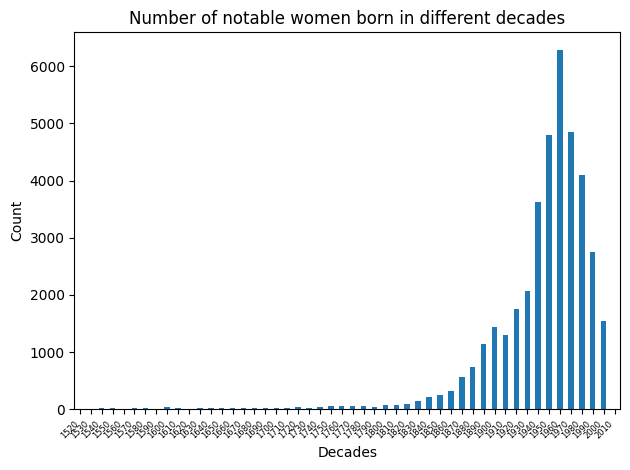

In [22]:
# Plotting gender = 'weiblich' over the decades

import matplotlib.pyplot as plt

# Count the number of women by decades
weiblich_data = data[data['gender'] == 'weiblich']  # Filter for gender = 'weiblich'
decade_counts = weiblich_data.groupby('birthDecade').size().reset_index(name='count')  # Count by decades

# Check if the grouped data is not empty
if not decade_counts.empty:
    # Plot the data
    decade_counts.plot(kind='bar', x='birthDecade', y='count', legend=False)
    plt.title('Number of notable women born in different decades')
    plt.xlabel('Decades')
    plt.ylabel('Count')
    plt.xticks(fontsize=6, rotation=45, ha='right')  # Adjust font size, rotate labels, and align them
    plt.tight_layout()  # Ensure everything fits within the figure
    plt.show()
else:
    print("No data available for gender = 'weiblich'.")

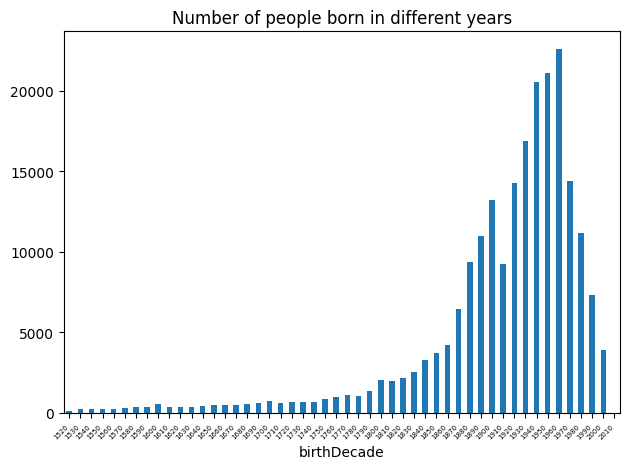

In [7]:
# Plotting the statistics, make the x labels smaller and prettify

import matplotlib.pyplot as plt

decades.plot(kind='bar')
plt.title('Number of people born in different years')
plt.xticks(fontsize=5, rotation=45, ha='right')  # Adjust font size, rotate labels, and align them
plt.tight_layout()  # Ensure everything fits within the figure

In [ ]:
gender.plot(kind='bar')
plt.title('Number of people with different gender')

In [ ]:
# visualization settings
sns.set(style="whitegrid")  # Set seaborn style for plots
plt.rcParams["figure.figsize"] = (10, 6)  # Set default figure size

In [ ]:
# Load the dataset
data = pd.read_csv('wiki_dataset.csv')

# Handle missing values
data = data.dropna(subset=['dewiki', 'de_views', 'enwiki', 'en_views', 'occupation'])  # Drop rows with missing critical data
data['gender'] = data['gender'].fillna('Unknown')  # Fill missing gender with 'Unknown'
data['birthdate'] = pd.to_datetime(data['birthdate'], errors='coerce')  # Convert birthdate to datetime, coerce errors to NaT
data['deathdate'] = pd.to_datetime(data['deathdate'], errors='coerce')  # Convert death to datetime, coerce errors to NaT

# Correct data types
data['de_views'] = pd.to_numeric(data['de_views'], errors='coerce')  # Ensure de_views is numeric
data['en_views'] = pd.to_numeric(data['en_views'], errors='coerce')  # Ensure en_views is numeric

# Handle invalid numeric values
data = data.dropna(subset=['de_views', 'en_views'])  # Drop rows with invalid numeric values

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the datasets
classified = pd.read_csv('final_classified_occupations.csv')
data = pd.read_csv('wiki_dataset.csv') 

# Define the category mapping (numeric codes)
category_mapping = {
    "Academics & Humanities": 1,
    "Arts & Culture": 2,
    "Business & Economics": 3,
    "Governance & Society": 4,
    "Health & Medicine": 5,
    "Law": 6,
    "Religion & Philosophy": 7,
    "STEM": 8
}

# Split occupations in classified and data into separate rows
classified['occupation'] = classified['occupation'].str.split(',')
classified = classified.explode('occupation').reset_index(drop=True)
classified['occupation'] = classified['occupation'].str.strip()
classified['label'] = classified['label'].map(category_mapping)

data['occupation'] = data['occupation'].str.split(',')
data = data.explode('occupation').reset_index(drop=True)
data['occupation'] = data['occupation'].str.strip()

# Merge data with classified to get labels
merged = pd.merge(data, classified, on='occupation', how='left')

# Filter rows where enwiki is not "No"
merged = merged[merged['enwiki'] != "No"]

# Convert views to numeric and filter out non-numeric values
merged['en_views'] = pd.to_numeric(merged['en_views'], errors='coerce')
merged['de_views'] = pd.to_numeric(merged['de_views'], errors='coerce')
merged = merged.dropna(subset=['en_views', 'de_views'])

# Aggregate views by unique ID to prevent inflation from multiple occupation labels
aggregated_views = merged.groupby('id')[['de_views', 'en_views']].mean().reset_index()
merged = merged.drop(columns=['de_views', 'en_views']).drop_duplicates(subset='id').merge(aggregated_views, on='id')

# --- Page Views by Occupation Label ---
category_views = merged.groupby('label')[['de_views', 'en_views']].mean().reset_index()
category_views['category'] = category_views['label'].map({v: k for k, v in category_mapping.items()})
category_views = category_views[['category', 'de_views', 'en_views']]
category_views.to_csv('pageviews_by_category.csv', index=False)

# --- Page Views by Gender ---
if 'gender' in merged.columns:
    gender_views = merged.groupby('gender')[['de_views', 'en_views']].mean().reset_index()
    gender_views.to_csv('pageviews_by_gender.csv', index=False)

# --- Page Views by Birth Century ---
if 'birthdate' in merged.columns:
    merged['birth_year'] = pd.to_datetime(merged['birthdate'], errors='coerce').dt.year
    merged['birth_century'] = (merged['birth_year'] // 100 + 1).astype('Int64')
    # Filter out rows with missing birth century
    merged = merged.dropna(subset=['birth_century'])
    birth_century_views = merged.groupby('birth_century')[['de_views', 'en_views']].mean().reset_index()
    birth_century_views.to_csv('pageviews_by_birth_century.csv', index=False)

# --- Plotting ---
def plot_bar(data, title, xlabel, ylabel, categories_column):
    plt.figure(figsize=(14, 8))
    
    # Set style
    sns.set_style("whitegrid")
    sns.set_palette("pastel")
    
    # Create bar plot
    ax = data.plot(kind='bar', x=categories_column, y=['de_views', 'en_views'], 
                  figsize=(14, 8), width=0.75, edgecolor='black', linewidth=0.7)
    
    # Customize title and labels
    plt.title(title, fontsize=16, pad=20, fontweight='bold')
    plt.xlabel(xlabel, fontsize=14, labelpad=10)
    plt.ylabel(ylabel, fontsize=14, labelpad=10)
    
    # Customize ticks
    plt.xticks(rotation=45, ha='right', fontsize=12)
    plt.yticks(fontsize=12)
    
    # Add grid and remove spines
    ax.yaxis.grid(True, linestyle='--', alpha=0.6)
    for spine in ['top', 'right']:
        ax.spines[spine].set_visible(False)
    
    # Customize legend
    plt.legend(['dewiki', 'enwiki'], fontsize=12, frameon=True, 
               facecolor='white', framealpha=1, edgecolor='black')
    
    # Add value labels on top of bars
    for p in ax.patches:
        ax.annotate(f"{p.get_height():,.0f}", 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha='center', va='center', 
                   xytext=(0, 5), 
                   textcoords='offset points',
                   fontsize=10)
    
    # Adjust layout
    plt.tight_layout()
    plt.show()

# Plot only if we have data
if len(category_views) > 0:
    plot_bar(category_views, 
             'Average Page Views by Occupation Label\n(dewiki vs enwiki)', 
             'Occupation Category', 'Average Page Views', 'category')
    
if 'gender' in merged.columns and len(gender_views) > 0:
    plot_bar(gender_views, 
             'Average Page Views by Gender\n(dewiki vs enwiki)', 
             'Gender', 'Average Page Views', 'gender')
    
if 'birthdate' in merged.columns and 'birth_century_views' in locals() and len(birth_century_views) > 0:
    # Sort birth century views for better visualization
    birth_century_views = birth_century_views.sort_values('birth_century')
    plot_bar(birth_century_views, 
             'Average Page Views by Birth Century\n(dewiki vs enwiki)', 
             'Birth Century', 'Average Page Views', 'birth_century')